# Exploratory Data Analysis of Google Play Store Apps

This project performs an in-depth Exploratory Data Analysis (EDA) on the Google Play Store dataset. **The aim is to uncover insights about app categories, user ratings, reviews, install trends, and differences between free and paid apps.** The analysis also explores how app popularity correlates with ratings and reviews and examines temporal trends in user satisfaction through visualizations and statistical techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_store = pd.read_csv("C:/Users/fyzul/Exploratory Data Analysis/googleplaystore.csv")

## Dataset Overview and Structure

In [3]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By comparing the **Non-Null Count** with the **total row count** (10841 in the example), one can **infer which columns have missing values.**

E.g., Rating has 9367 non-null, so it has: **10841 - 9367 = 1474 missing values.**

In [5]:
df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### To identify duplicate rows in the DataFrame

In [6]:
df_store.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

## Data Cleaning

To ensure accurate analysis, we handle missing values and duplicates. We drop any rows with null entries and remove duplicate records to avoid biased results.

### Removing Missing and Duplicate Records 

In [7]:
# Remove all rows that contain any missing (NaN) values to ensure data completeness
df_store.dropna(inplace=True)

# Eliminate duplicate rows to maintain data integrity and avoid redundancy
df_store.drop_duplicates(inplace=True)

In [8]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [9]:
#To check for null (missing) values
df_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Outlier Detection and Removal  
Outliers can skew analysis results. We use Z-score to identify and remove extreme outliers in the 'Rating' column, keeping values within 3 standard deviations.

In [10]:
# Remove outliers in the 'Rating' column using Z-score method (keep values within 3 standard deviations from the mean)
z_scores = np.abs((df_store['Rating'] - df_store['Rating'].mean()) / df_store['Rating'].std())
df_store = df_store[z_scores < 3]

### Data Type Conversion  
Some columns like 'Installs' and 'Reviews' are stored as strings. We clean these values by removing special characters and converting them into appropriate numeric types for further analysis.

In [11]:
# Remove '+' and ',' characters from the 'Installs' column to clean string data for conversion
df_store['Installs'] = df_store['Installs'].str.replace('+', '', regex=False)  # Eliminate '+' sign appended to install counts
df_store['Installs'] = df_store['Installs'].str.replace(',', '', regex=False)  # Remove thousands separator ',' for numeric conversion

# Convert the cleaned 'Installs' column from string to integer data type for quantitative analysis
df_store['Installs'] = df_store['Installs'].astype(int)

# Convert the 'Reviews' column to integer data type to enable numerical operations
df_store['Reviews'] = df_store['Reviews'].astype(int)

In [12]:
print(df_store.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [13]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Visual Explorations

###  Univariate Analysis (Bar Plot) - Category Distribution  
We visualize the number of apps in each category using a bar plot to understand which app types are most common on the platform.

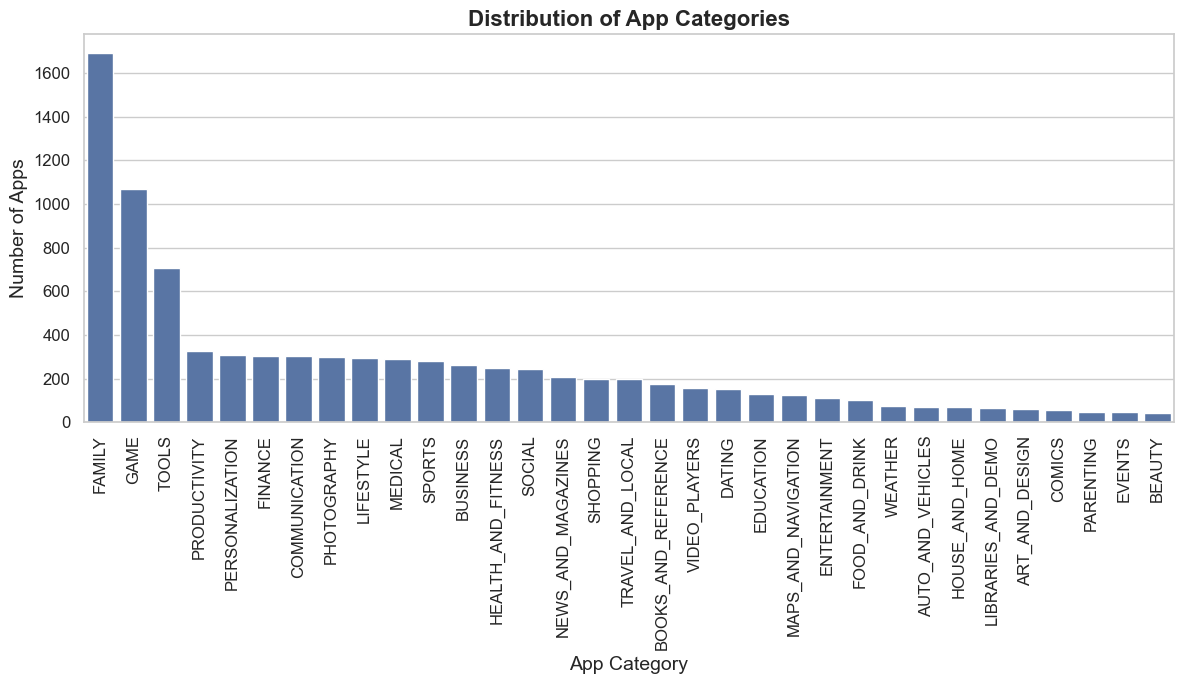

In [14]:
# Set the plotting style to whitegrid for a clean, modern background
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

# Generate a countplot for the 'Category' column, ordered by frequency
ax = sns.countplot(
    data=df_store,
    x='Category',
    order=df_store['Category'].value_counts().index
)

ax.set_xlabel('App Category', fontsize=14)
ax.set_ylabel('Number of Apps', fontsize=14)
ax.set_title('Distribution of App Categories', fontsize=16, fontweight='bold')

# Rotate x-axis labels vertically for clarity and set font size
plt.xticks(rotation=90, fontsize=12)
# Set y-axis tick labels to a readable font size
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Bivariate Analysis (Scatter Plot) - Reviews vs. Ratings  
We explore the relationship between user reviews and app ratings to understand user engagement and satisfaction.

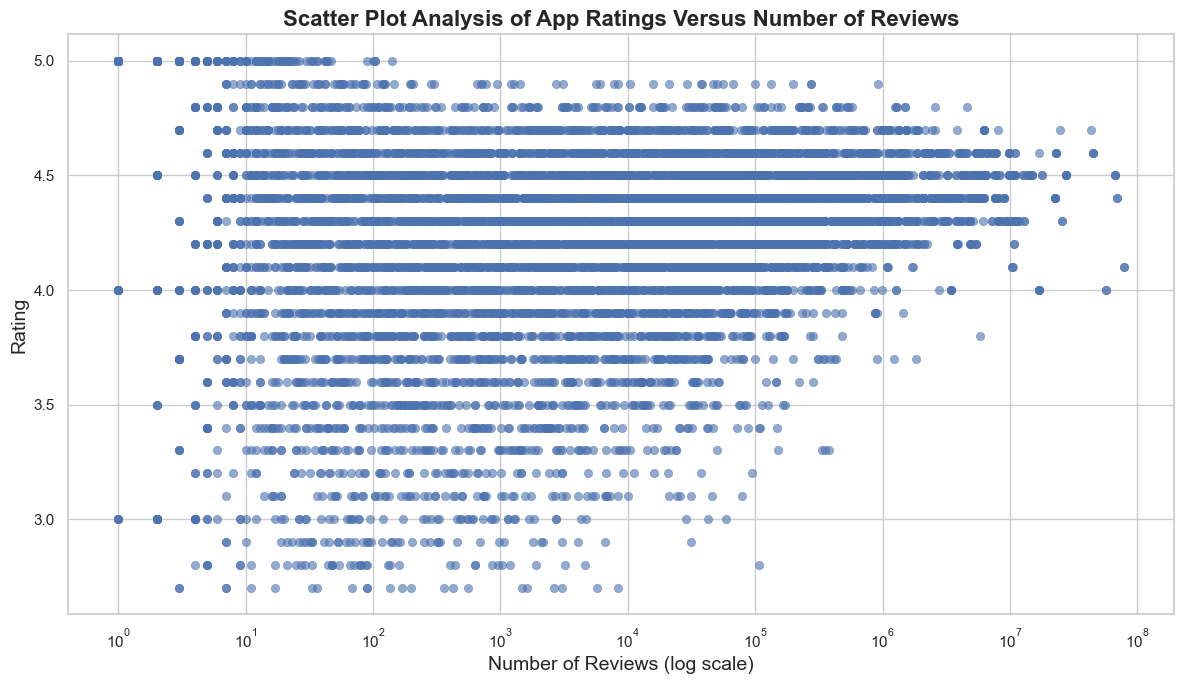

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

# Create scatter plot showing the relationship between Reviews and Rating
# Apply log scale to Reviews for better visualization of wide range of values
ax = sns.scatterplot(
    data=df_store, 
    x='Reviews', 
    y='Rating', 
    alpha=0.6,               # Make points slightly transparent to reduce overlap clutter
    edgecolor=None           # Remove point edges for cleaner appearance
)

# Use logarithmic scale on x-axis to handle skewness in number of reviews
ax.set_xscale('log')

ax.set_xlabel('Number of Reviews (log scale)', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)

ax.set_title('Scatter Plot Analysis of App Ratings Versus Number of Reviews', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

### Box Plot (Distribution by Category) - Installs by Category
A box plot helps us visualize the distribution of install counts across different app categories and identify variability or outliers.

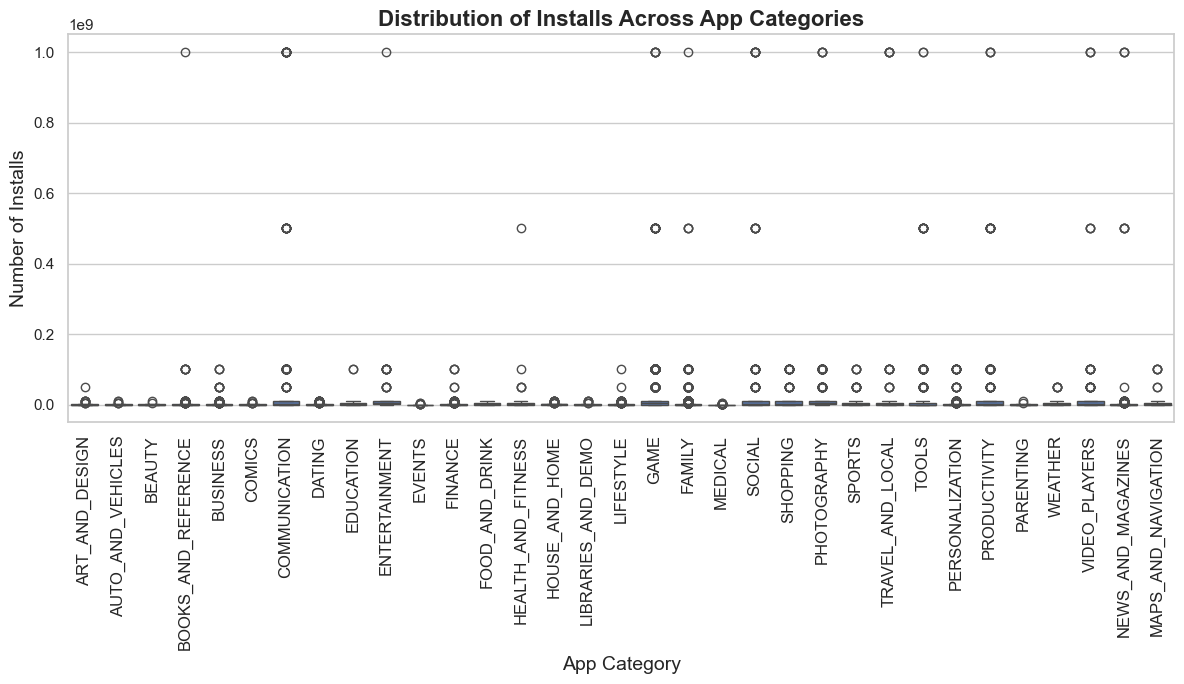

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

# Generate a box plot to visualize the distribution and spread of 'Installs' across each 'Category'
# This helps identify central tendency, variability, and potential outliers within categories
ax = sns.boxplot(data=df_store, x='Category', y='Installs')

ax.set_xlabel('App Category', fontsize=14)

# Rotate x-axis labels by 90 degrees to prevent overlap and improve visibility
plt.xticks(rotation=90, fontsize=12)

ax.set_ylabel('Number of Installs', fontsize=14)
ax.set_title('Distribution of Installs Across App Categories', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.show()

# Insights & Inferences

### Visualizing the Relationship Between App Ratings and Install Counts by Category 

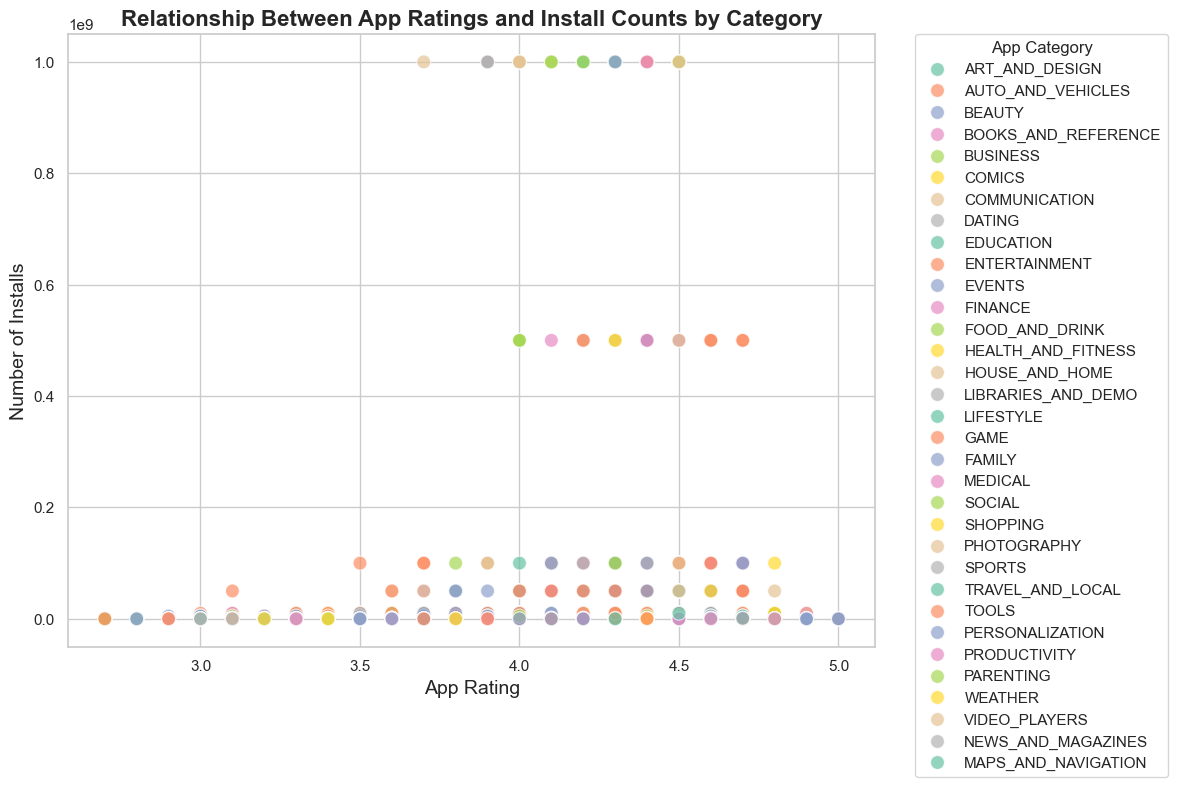

In [17]:
sns.set(style="whitegrid")

# Create a figure with sufficient size for clear visualization
plt.figure(figsize=(12, 8))

# Scatter plot to explore how app ratings relate to the number of installs
ax = sns.scatterplot(
    data=df_store,
    x='Rating',
    y='Installs',
    hue='Category',       # 'hue' adds color distinction based on the app category
    palette='Set2',
    alpha=0.7,            # Slight transparency to handle overlap
    edgecolor='w',        
    s=100
)

plt.grid(True)

plt.xlabel('App Rating', fontsize=14)
plt.ylabel('Number of Installs', fontsize=14)

plt.title('Relationship Between App Ratings and Install Counts by Category', fontsize=16, fontweight='bold')

# Place legend outside the plot for better readability
plt.legend(title='App Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Improve layout to avoid element overlap
plt.tight_layout()

plt.show()

### Line Plot of Average App Ratings Over Time (Based on Last Update)

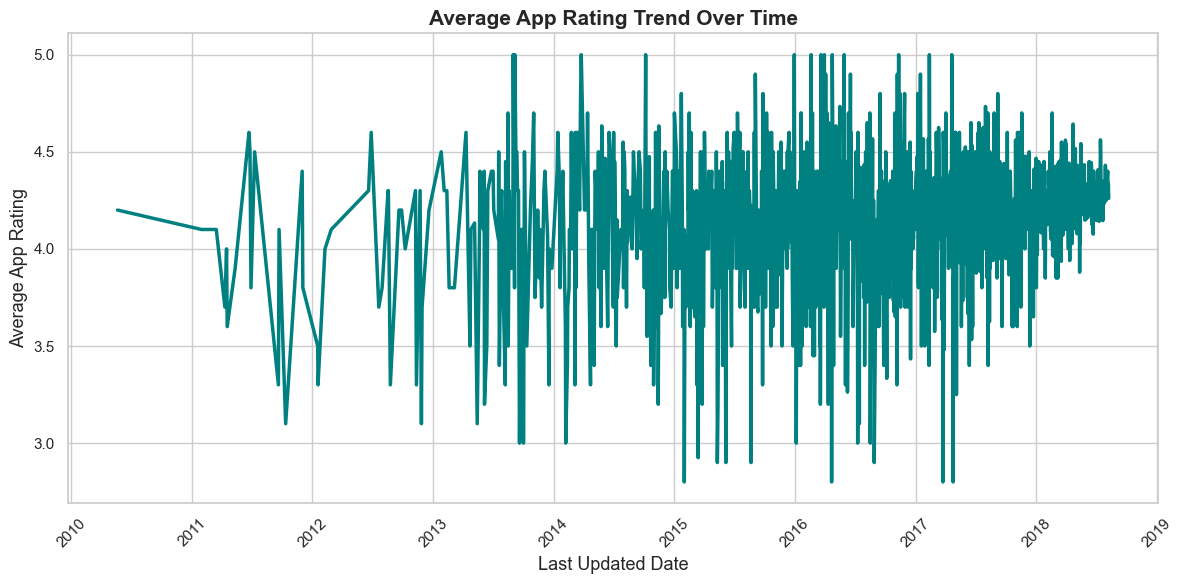

In [18]:
# Ensure the 'Last Updated' column is in datetime format
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])

# Optional: Aggregate average rating by date to smooth out the line plot
ratings_over_time = df_store.groupby('Last Updated')['Rating'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot the average rating trend over time
sns.lineplot(data=ratings_over_time, x='Last Updated', y='Rating', color='teal', linewidth=2.5)

plt.xlabel('Last Updated Date', fontsize=13)
plt.ylabel('Average App Rating', fontsize=13)
plt.title('Average App Rating Trend Over Time', fontsize=15, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

plt.show()

### Time Series Analysis - Temporal Trends in App Ratings  
We convert the 'Last Updated' column to datetime and analyze how the average rating of apps has changed over time.

In [19]:
# Convert 'Last Updated' to datetime
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])

# Set 'Last Updated' as the index
df_store.set_index('Last Updated', inplace=True)

# Resample 'Rating' to monthly frequency
df_store_monthly = df_store['Rating'].resample('ME').mean()

### Visualizing Monthly Trend of Average App Ratings Over Time

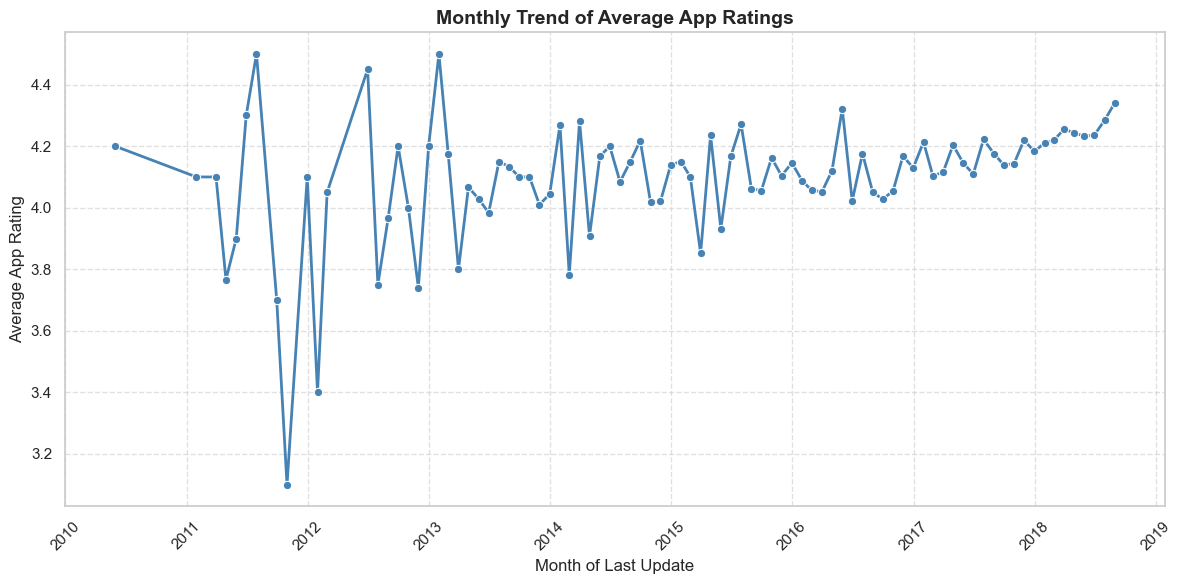

In [20]:
plt.figure(figsize=(12, 6))

# Plot the monthly average rating using a line chart
sns.lineplot(data=df_store_monthly, marker='o', linewidth=2, color='steelblue')

plt.xlabel('Month of Last Update', fontsize=12)
plt.ylabel('Average App Rating', fontsize=12)

plt.title('Monthly Trend of Average App Ratings', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

### Enhanced Scatter Plot of App Ratings Versus Number of Reviews with Category Differentiation

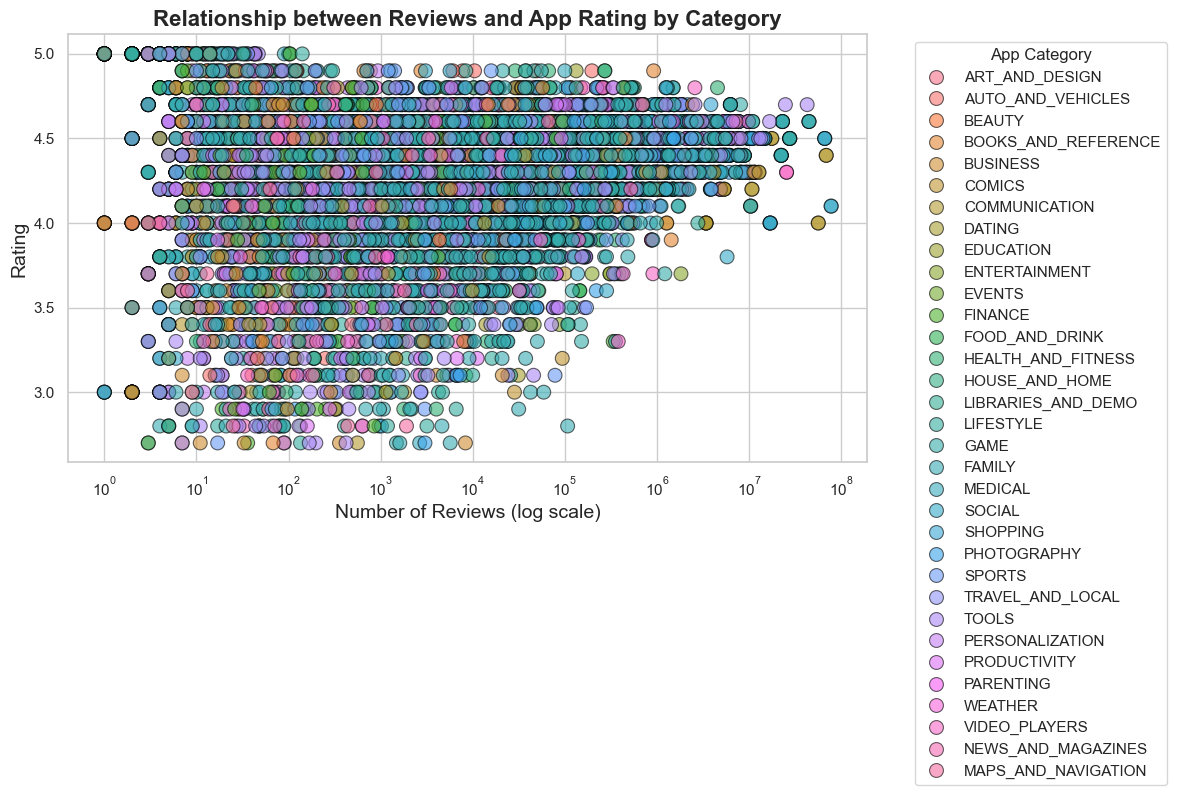

In [21]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(12, 7))

# Generate scatter plot mapping 'Reviews' to x-axis and 'Rating' to y-axis
# Use 'Category' as hue to differentiate apps by category with distinct colors
ax = sns.scatterplot(
    data=df_store,
    x='Reviews',
    y='Rating',
    hue='Category',          # Color points by app category
    palette="husl",          
    s=100,                   
    alpha=0.6,               # Use transparency to reduce overplotting effects
    edgecolor="black"        # Add black edge to markers for better distinction between points
)

ax.set_xscale('log')

plt.xlabel('Number of Reviews (log scale)', fontsize=14)
plt.ylabel('Rating', fontsize=14)

plt.title('Relationship between Reviews and App Rating by Category', fontsize=16, fontweight='bold')

if len(df_store['Category'].unique()) > 1:
    plt.legend(title='App Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Hypothesis Testing (t-test) - Free vs Paid App Ratings  
We use a t-test to determine if there's a statistically significant difference in average ratings between free and paid apps.

In [22]:
from scipy.stats import ttest_ind

# Filter the dataset to create a subset of apps that are free
free_apps = df_store[df_store['Type'] == 'Free']

# Filter the dataset to create a subset of apps that are paid
paid_apps = df_store[df_store['Type'] == 'Paid']

In [27]:
# Perform an independent two-sample t-test to compare the average ratings
# Null Hypothesis (H0): There is no significant difference in average ratings between free and paid apps
# Alternative Hypothesis (H1): There is a significant difference in average ratings between free and paid apps

t_stat, p_value = ttest_ind(
    free_apps['Rating'].dropna(),  # Drop missing values to avoid computation errors
    paid_apps['Rating'].dropna(),
    equal_var=False  # Welch’s t-test (assumes unequal variances, safer for real-world data)
)

# Output the test statistics
print(f"T-statistic: {t_stat:.6f}")
print(f"P-value: {p_value:.6f}")

T-statistic: -4.244403
P-value: 0.000025


In [28]:
# Interpret the p-value to draw a conclusion about the hypothesis test
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in app ratings between free and paid apps.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in app ratings between free and paid apps.")

Reject the null hypothesis: There is a statistically significant difference in app ratings between free and paid apps.


# Conclusion

This exploratory data analysis provided meaningful insights into the landscape of mobile applications on the Google Play Store. Key findings include:

### Key Observations:

#### App Availability
- A majority of the apps are offered **free of charge**, reflecting a **freemium-driven market** where monetization happens through ads or in-app purchases.

#### App Popularity
- **Communication**, **Tools**, and **Entertainment** apps dominate in terms of sheer count and install volume.
- Categories like **Games** and **Social** apps also show high engagement, especially among younger audiences.

#### Ratings and Reviews
- The **average rating** tends to hover between **4.0 to 4.5**, suggesting that users are generally satisfied with their app experiences.
- A **positive correlation** is observed between the number of **reviews** and the **rating**, although a few highly-reviewed apps suffer from lower ratings — possibly due to performance or UI issues post-launch.

#### Installs Distribution
- The number of installs is **highly skewed**, with a small percentage of apps receiving the bulk of downloads — indicating **winner-takes-most** dynamics.
- Outliers in the install count are often big names (e.g., **WhatsApp**, **Facebook**).

#### Paid vs. Free Apps
- A **t-test analysis** showed a **statistically significant difference** in average ratings between **free and paid apps**, with **paid apps slightly outperforming** — possibly due to fewer ads and better support.

#### Temporal Analysis
- The **average rating over time** remains relatively stable but reflects minor fluctuations, which may correlate with **UI/UX updates**, **policy changes**, or **user expectations**.